# Pymaceuticals

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

## Prepare the Data

In [2]:
# read in both csv files into separate dataframes
meta_df = pd.read_csv("resources/Mouse_metadata.csv")
results_df = pd.read_csv("resources/Study_results.csv")

# show the head to see structure of meta df
meta_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# show the head to see structure of results df
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# merge datasets on default 'inner' join
merge_df = pd.merge(results_df, meta_df, on="Mouse ID")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
# find the number of unique mice
num_mice = len(merge_df["Mouse ID"].value_counts())
num_mice

249

In [6]:
# find the number of duplicated rows
duplicate_df = merge_df.duplicated(subset=["Mouse ID","Timepoint"]).sum()
duplicate_df

5

In [7]:
# find just the duplicated data
merge_df.loc[merge_df.duplicated(subset=["Mouse ID","Timepoint"]),:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# find all data associated with above Mouse ID
merge_df.loc[merge_df["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
# drop all rows with duplicate Mouse ID and Timepoint and create new dataframe
cleaned_df = merge_df[merge_df["Mouse ID"] != "g989"]
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [10]:
len(cleaned_df["Mouse ID"].value_counts())

248

In [11]:
# make sure rows associated with g989 ID are gone
cleaned_df.loc[cleaned_df["Mouse ID"] == "g989",:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


## Summary Statistics

In [12]:
# A row for each drug regimen
    # These regimen names should be contained in the index column.
# A column for each of the following statistics: mean, median, variance, standard deviation, and SEM of the tumor volume.

# groupby cleaned df by Drug Regimen
drug_df = cleaned_df.groupby("Drug Regimen")

# create series for each statistic to become columns in new df
drug_mean = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_variance = drug_df["Tumor Volume (mm3)"].var()
drug_standev = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

# create new df
tumor_stats = pd.DataFrame({"Mean":drug_mean,
                           "Median":drug_median,
                           "Variance":drug_variance,
                           "Standard Deviation":drug_standev,
                           "SEM":drug_sem})

tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# using aggregate method
tumor_stats_agg = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
tumor_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Visualizations

In [14]:
# Bar Chart 1
    # show the total number of time points for all mice tested for each drug regimen
    # drug x axis, tot time pts y axis
    # pandas method
   


In [15]:

drug_index_df = cleaned_df.set_index("Drug Regimen")
drug_index_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,b128,0,45.000000,0,Female,9,22
Capomulin,b128,5,45.651331,0,Female,9,22
Capomulin,b128,10,43.270852,0,Female,9,22
Capomulin,b128,15,43.784893,0,Female,9,22
Capomulin,b128,20,42.731552,0,Female,9,22
...,...,...,...,...,...,...,...
Capomulin,m601,25,33.118756,1,Male,22,17
Capomulin,m601,30,31.758275,1,Male,22,17
Capomulin,m601,35,30.834357,1,Male,22,17


In [16]:
drug_index_df["Timepoint"].count()

1880

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

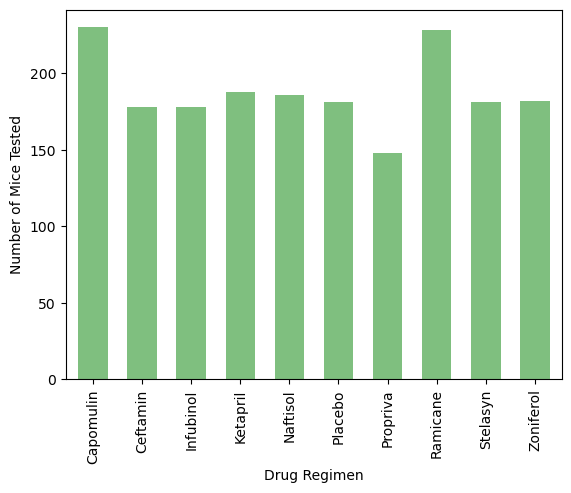

In [17]:
bar_pandas = cleaned_df.groupby("Drug Regimen").count()["Timepoint"].plot(kind="bar", width=0.6, ylabel="Number of Mice Tested",
                                                                         alpha=0.5, color="green", sort_columns=True)
bar_pandas

<BarContainer object of 10 artists>

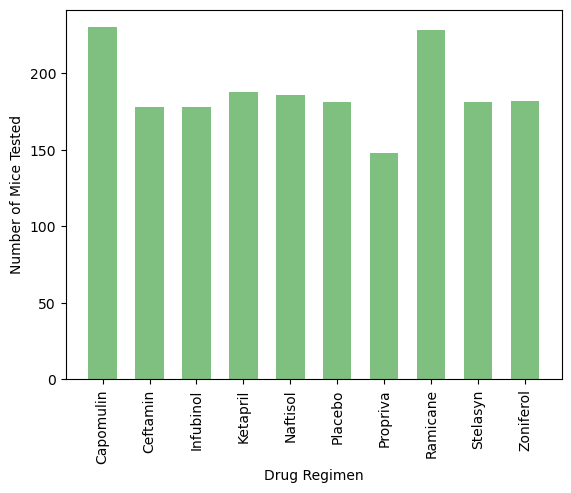

In [18]:
# Bar Chart 2
    # show the total number of time points for all mice tested for each drug regimen
    # drug x axis, tot time pts y axis
    # matplotlib method


tests_per_drug = cleaned_df.groupby("Drug Regimen").count()["Timepoint"]
#tests_per_drug
x_axis = np.arange(len(tests_per_drug))
#x_axis
drug_labels = []
tick_locations = [value for value in x_axis]
fig0, ax0 = plt.subplots()
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo","Propriva",
                           "Ramicane","Stelasyn","Zoniferol"], rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
ax0.bar(x_axis, tests_per_drug, width=0.6, color="g", alpha=0.5, align="center")


In [19]:
# pie chart 1
    # create a pie chart using pandas that shows the distribution of male vs female mic in the study
    
cleaned_df["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

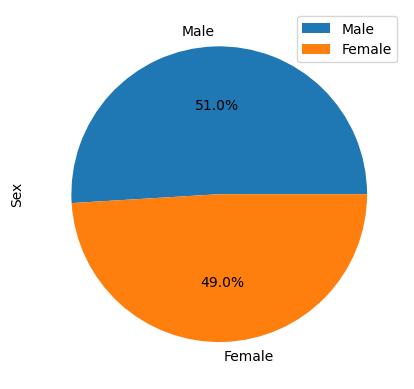

In [20]:
pie_pandas = cleaned_df["Sex"].value_counts().plot(kind="pie", ylabel="Sex", legend=True, autopct='%1.1f%%')
pie_pandas

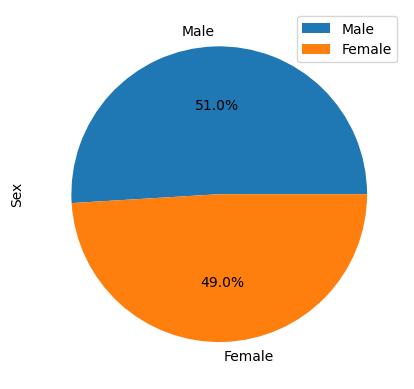

In [21]:
# pie chart 2
    # create a pie chart using matplotlib that shows the distribution of male vs female mic in the study
    
labels = ["Male","Female"]
counts = [958,922]

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.legend(labels)
plt.show()

In [22]:
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [23]:
# get the last timeframe for each mouse

greatest_df = pd.DataFrame(cleaned_df.groupby("Mouse ID").max()["Timepoint"])
greatest_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_merge = pd.merge(cleaned_df, greatest_df, on=["Mouse ID", "Timepoint"])
tumor_volume_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
243,t565,45,34.455298,0,Capomulin,Female,20,17
244,i557,45,47.685963,1,Capomulin,Female,1,24
245,m957,45,33.329098,1,Capomulin,Female,3,19
246,f966,20,30.485985,0,Capomulin,Male,16,17


In [50]:
tumor_volume_merge["Drug Regimen"].value_counts()

Capomulin    25
Ketapril     25
Naftisol     25
Infubinol    25
Ramicane     25
Zoniferol    25
Placebo      25
Ceftamin     25
Stelasyn     24
Propriva     24
Name: Drug Regimen, dtype: int64

In [63]:
# list of 4 most promising drug treatments
promising_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# empty list for each drug volume data
cap_volume = []
ram_volume = []
infu_volume = []
ceft_volume = []
# list of above drug volume lists to be used in same boxplot fig
drug_volume = [cap_volume, ram_volume, infu_volume, ceft_volume]

# loop through tumor_volume_merge df using conditional and iloc to append corresponding tumor volumes to
# the empty lists for each drug
for index in range(len(tumor_volume_merge)):
    if tumor_volume_merge["Drug Regimen"].iloc[index] == "Capomulin":
        cap_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume_merge["Drug Regimen"].iloc[index] == "Ramicane":
        ram_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume_merge["Drug Regimen"].iloc[index] == "Infubinol":
        infu_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume_merge["Drug Regimen"].iloc[index] == "Ceftamin":
        ceft_volume.append(tumor_volume_merge["Tumor Volume (mm3)"].iloc[index])
        
# find upper/lower bounds and potential outliers for each drug volume list

# set quantiles
cap_quant = cap_volume.quantile([0.25,0.5,0.75])
ram_quant = ram_volume.quantile([0.25,0.5,0.75])
infu_quant = infu_volume.quantile([0.25,0.5,0.75])
ceft_quant = ceft_volume.quantile([0.25,0.5,0.75])

# set iqr
lowerq_cap = cap_quant[0.25]
upperq_cap = cap_quant[0.75]
iqr_cap = upperq_cap-lowerq_cap
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)





AttributeError: 'list' object has no attribute 'quantile'

In [62]:
drug_volume

[[38.98287774,
  38.75326548,
  32.37735684,
  23.34359787,
  38.93963263,
  28.48403281,
  41.48300765,
  40.72857787,
  46.53920617,
  31.02392294,
  38.1251644,
  40.65812366,
  36.04104736,
  37.31184577,
  41.58152074,
  31.8962384,
  40.1592203,
  37.07402422,
  38.84687569,
  39.95234669,
  34.45529799,
  47.68596303,
  33.32909778,
  30.48598484,
  28.43096411],
 [38.34200823,
  36.56165229,
  31.56046955,
  38.4076183,
  43.0475426,
  37.31123552,
  36.13485243,
  44.18345092,
  22.05012627,
  33.39765251,
  37.22565033,
  32.97852192,
  33.56240217,
  29.12847181,
  38.81036633,
  40.66771292,
  30.56462509,
  43.16637266,
  31.09533505,
  30.27623175,
  40.65900627,
  30.63869575,
  43.41938077,
  45.22086888,
  36.37451039],
 [36.3213458,
  72.2267309,
  46.25011212,
  57.03186187,
  67.68556862,
  66.19691151,
  62.11727887,
  55.62942846,
  62.75445141,
  65.52574285,
  67.28962147,
  54.65654872,
  54.04860769,
  60.96971133,
  67.97341878,
  66.08306589,
  45.69933088,
